Stability of the Grid System-**Problem Statement**

Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy sources, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.

Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

It has 12 primary predictive features and two dependent variables.

Predictive features:

'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
Dependent variables:

'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
'stabf': a categorical (binary) label ('stable' or 'unstable').
Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set.

In [1]:
# Importing all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # to split the dataset into training and testing set
#To perform cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
# Selecting approprite models for measuring performance
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
#all classification model according to info given.
# To create and select  Classifier model
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# To create and select Gradient boost classifier
from xgboost import XGBClassifier
# To create and select LigtGBM Classifier
from lightgbm import LGBMClassifier
# To make standardize our training and testing set
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
#Checking missing values and getting info
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

No null value as well The target value 'stabf' is object because that having a categorical/binary class values. So, based on the above result we do not need to encode anything.
But according to instructions we need to drop stab column


**PREPROCESSING DATA AND SCALING IT**

In [5]:
# Drop stab column
df = df.drop(columns = ['stab'])
# Separate the target and feature variables
X = df.drop(columns =['stabf'])
y = df.stabf

In [6]:
# Split the data into training and testing set AS 80 TO 20 with random state-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

In [7]:
#checking disribution of target variable
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [8]:
# scaling data aa these properties can be exploited to create better features and models.

scaler = StandardScaler()

# standardize the training data
standard_train_X = scaler.fit_transform(X_train)
standard_train_X = pd.DataFrame(standard_train_X, columns=X_train.columns)

In [9]:
# standardize the test data
X_test = X_test.reset_index(drop=True)
standard_test_X = scaler.transform(X_test)
standard_test_X = pd.DataFrame(standard_test_X, columns=X_test.columns)

In [10]:
#check the data
standard_train_X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [25]:
#we will define a function to model differnet classifiers as to maintain the code readebility.
def train_model(model, X_train = standard_train_X, y_train = y_train, X_test = standard_test_X):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
   
    return classification_report(y_pred, y_test)

In [26]:
#all the models on which questions are being asked
rfc = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, random_state=1)
lgbm = LGBMClassifier(random_state=1)
extc = ExtraTreesClassifier(random_state=1)

In [27]:
# Accuracy of RandomForestlassifier 
rfc.fit(standard_train_X, y_train)
rfc_accuracy = accuracy_score(y_true=y_test, y_pred=rfc.predict(standard_test_X))
print('Accuracy: {}'.format(round(rfc_accuracy, 4)))

Accuracy: 0.929


In [28]:
# Accuracy of XGBClassifier
xgb.fit(standard_train_X, y_train)
xgb_accuracy = accuracy_score(y_true=y_test, y_pred=xgb.predict(standard_test_X))
print('Accuracy: {}'.format(round(xgb_accuracy, 4)))

Accuracy: 0.9195


In [29]:
# Accuracy of LGBMClassifier
lgbm.fit(standard_train_X, y_train)
lgbm_accuracy = accuracy_score(y_true=y_test, y_pred=lgbm.predict(standard_test_X))
print('Accuracy: {}'.format(round(lgbm_accuracy, 4)))

Accuracy: 0.9375


In [30]:
# the Classification report of each model
print("Classification Report using RandomForestClassifier \n", train_model(rfc))
print("Classification Report using ExtraTreesClassifier \n", train_model(extc))
print("Classification Report using XGBClassifier \n", train_model(xgb))
print("Classification Report using LGBMClassifier \n", train_model(lgbm))

Classification Report using RandomForestClassifier 
               precision    recall  f1-score   support

      stable       0.88      0.92      0.90       680
    unstable       0.96      0.93      0.95      1320

    accuracy                           0.93      2000
   macro avg       0.92      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Classification Report using ExtraTreesClassifier 
               precision    recall  f1-score   support

      stable       0.85      0.94      0.89       644
    unstable       0.97      0.92      0.95      1356

    accuracy                           0.93      2000
   macro avg       0.91      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Classification Report using XGBClassifier 
               precision    recall  f1-score   support

      stable       0.85      0.92      0.88       655
    unstable       0.96      0.92      0.94      1345

    accuracy                      

In [37]:
#combination of hyperparameters-randomized search cv
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [46]:
# Define Randomized Search Cross Validation 
from sklearn.model_selection import RandomizedSearchCV
rsearch = RandomizedSearchCV(extc, hyperparameter_grid, random_state=1)
search=rsearch.fit(standard_train_X, y_train)

In [41]:
#confusion matrix function:
def make_confusion_matrix(model, X_train = standard_train_X, X_test=standard_test_X, y_test = y_test, labels = ['stable', 'unstable']):
    new_pred = model.predict(X_test)
    cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_pred, labels=labels)
    return cnf_mat

In [42]:
# Printing out confusion matrix of all the models
print("Confusion Matrix using RandomForestClassifier \n", make_confusion_matrix(rfc))
print("Confusion Matrix using ExtraTreesClassifier \n", make_confusion_matrix(extc))
print("Confusion Matrix using XGBClassifier \n", make_confusion_matrix(xgb))
print("Confusion Matrix using LGBMClassifier \n", make_confusion_matrix(lgbm))


Confusion Matrix using RandomForestClassifier 
 [[ 625   87]
 [  55 1233]]
Confusion Matrix using ExtraTreesClassifier 
 [[ 606  106]
 [  38 1250]]
Confusion Matrix using XGBClassifier 
 [[ 603  109]
 [  52 1236]]
Confusion Matrix using LGBMClassifier 
 [[ 635   77]
 [  48 1240]]


In [47]:
search.best_params_.values()

dict_values([1000, 2, 8, None])

[0.11883563 0.11959116 0.11498944 0.11603132 0.03887765 0.03992524
 0.04026248 0.03984075 0.08900988 0.0929049  0.09946587 0.09026569]


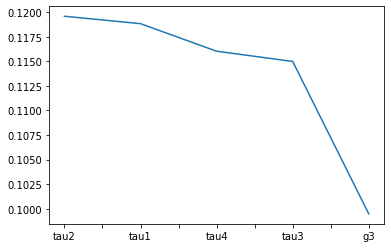

In [49]:
# Feature Importance whic was least important?
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='line')
plt.show()